# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (10 puntos).
2. Graficar los precios (10 puntos).

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [69]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(name=tickers, data_source='yahoo', start='2011-01-01', end='2015-12-31')
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

In [70]:
names = ['^GSPC','MSFT','WBA','TSLA']
start = '2011-01-01'
end = '2015-12-31'

In [71]:
closes = get_adj_closes(tickers=names,start_date=start)
closes.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2011-01-03,22.558224,26.620001,32.173080,1271.869995
2011-01-04,22.646908,26.670000,32.443100,1270.199951
2011-01-05,22.574345,26.830000,32.893124,1276.560059
2011-01-06,23.235449,27.879999,32.991314,1273.849976
2011-01-07,23.058081,28.240000,32.794937,1271.500000


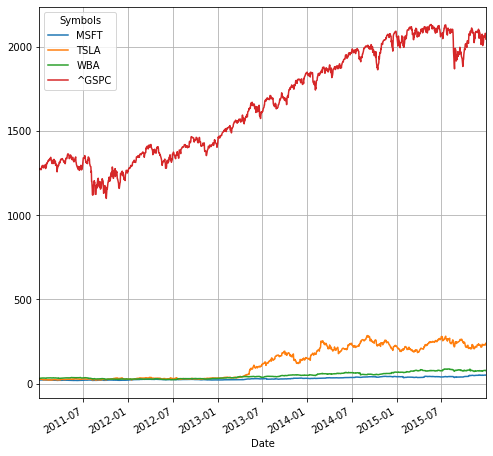

In [72]:
closes.plot(figsize=(8,8),grid=True)

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [73]:
ret = closes.pct_change().dropna()
ret

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2011-01-04,0.003931,0.001878,0.008393,-0.001313
2011-01-05,-0.003204,0.005999,0.013871,0.005007
2011-01-06,0.029286,0.039135,0.002985,-0.002123
2011-01-07,-0.007634,0.012913,-0.005952,-0.001845
2011-01-10,-0.013287,0.007436,0.021707,-0.001376
2011-01-11,-0.003898,-0.052373,-0.002930,0.003725
2011-01-12,0.015653,0.000000,0.009062,0.009008
2011-01-13,-0.012610,-0.027448,0.010679,-0.001711
2011-01-14,0.003902,-0.017925,-0.004803,0.007385


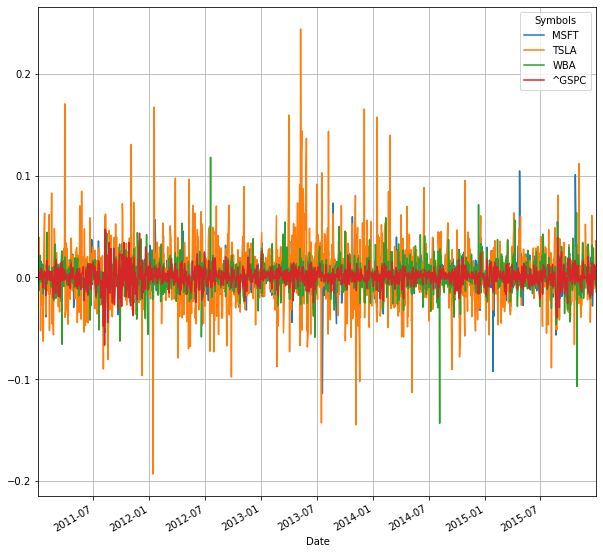

In [74]:
ret.plot(figsize=(10,10),grid=True)

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [75]:
r_medio_diario = pd.DataFrame(data={'R Medio Diario':ret.mean()},index=ret.columns)
r_medio_diario

,R Medio Diario
Symbols,
MSFT,0.000764
TSLA,0.002296
WBA,0.000839
^GSPC,0.000425


In [76]:
vol_diaria = pd.DataFrame(data={'Vol Diaria':ret.std()},index=ret.columns)
vol_diaria

,Vol Diaria
Symbols,
MSFT,0.014799
TSLA,0.033246
WBA,0.016246
^GSPC,0.009738


In [77]:
resumen_anual = pd.DataFrame(data={'Media':252*ret.mean(),'Volatilidad':np.sqrt(252)*ret.std()},index=ret.columns)
resumen_anual

,Media,Volatilidad
Symbols,,
MSFT,0.192464,0.234922
TSLA,0.578548,0.527757
WBA,0.211496,0.257905
^GSPC,0.107092,0.154583


## 4. Gráfico rendimientos esperados vs. volatilidad (30 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (10 puntos).

*Nota:* el ajuste de la línea recta corresponde a una regresión lineal. Si no saben como hacerlo, por favor preguntar en asesoría.

Text(0.23492240844613382, 0.19246350011174246, 'MSFT')

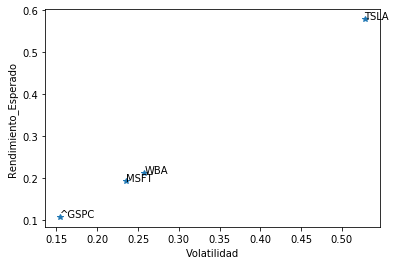

In [78]:
x_points =  resumen_anual['Volatilidad']
y_points = resumen_anual['Media']
plt.figure()
plt.plot(x_points, y_points, '*')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento_Esperado')
plt.text(resumen_anual.loc['^GSPC','Volatilidad'],resumen_anual.loc['^GSPC','Media'], '^GSPC')
plt.text(resumen_anual.loc['WBA','Volatilidad'],resumen_anual.loc['WBA','Media'], 'WBA')
plt.text(resumen_anual.loc['TSLA','Volatilidad'],resumen_anual.loc['TSLA','Media'], 'TSLA')
plt.text(resumen_anual.loc['MSFT','Volatilidad'],resumen_anual.loc['MSFT','Media'], 'MSFT')

Symbols
MSFT     0.234922
TSLA     0.527757
WBA      0.257905
^GSPC    0.154583
Name: Volatilidad, dtype: float64

In [84]:
import scipy.optimize as opt

In [85]:
def obj_fun(beta, Er, sigma):
    return ((Er - (beta[0] + beta[1] * sigma))**2).sum()

beta_0 = [0, 1]

In [86]:
solution = opt.minimize(obj_fun, beta_0, args=(y_points, x_points))
solution

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 1.])

In [87]:
beta = solution.x
beta

array([0., 1.])

In [88]:
x_points

array([0.15458307, 0.23492241, 0.25790504, 0.52775734])

In [89]:
y_points

Symbols
0.154583   NaN
0.234922   NaN
0.257905   NaN
0.527757   NaN
Name: Media, dtype: float64

In [81]:
y_points = y_points[np.sort(x_points)]
x_points = np.sort(x_points)

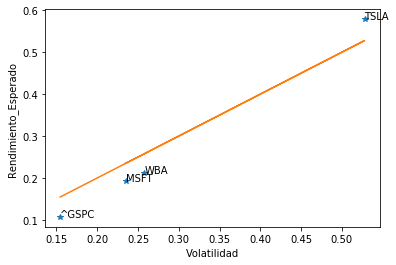

In [90]:
x_points =  resumen_anual['Volatilidad']
y_points = resumen_anual['Media']
plt.figure()
plt.plot(x_points, y_points, '*')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento_Esperado')
plt.text(resumen_anual.loc['^GSPC','Volatilidad'],resumen_anual.loc['^GSPC','Media'], '^GSPC')
plt.text(resumen_anual.loc['WBA','Volatilidad'],resumen_anual.loc['WBA','Media'], 'WBA')
plt.text(resumen_anual.loc['TSLA','Volatilidad'],resumen_anual.loc['TSLA','Media'], 'TSLA')
plt.text(resumen_anual.loc['MSFT','Volatilidad'],resumen_anual.loc['MSFT','Media'], 'MSFT')
plt.plot(x_points, beta[0] + beta[1] * x_points)

Como lo podemos ver en las gráficas, cuando esperamos mayores rendimientos, la volatilidad tambien aumenta, por lo que asumimos un riesgo mayor. Por el contrario, cuando esperamos rendimientos pequeños tambien asumimos riesgos más pequeños. 
La pendiente de la recta es positiva debido a la relación que hay entre el rendimiento esperado y el riesgo.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>